# Linear Regression on real dataset

This notebook illustrate linear regression on dataset: ...csv<br>
Dataset is read by pandas modul

In [1]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from IPython.display import display

In [2]:
data = pd.read_csv('data_sets/housing_prices.csv')

In [3]:
data.head()

,area,rooms,price
0,210,3,399900
1,160,3,329900
2,240,3,369000
3,141,2,232000
4,300,4,539900


In [4]:
x_train = np.array(data['area'].to_list())
y_train = np.array(data['price'].to_list())

In [5]:
def compute_cost(x, y, w, b): 
    """
    Calculates cost function for given model parameters w and b
    
    Arguments:
      x (ndarray (m,)): Input data, m - size of vector 
      y (ndarray (m,)): Target data points, m - size of vector
      w,b (scalar)    : Model Parameters w and b  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [6]:
def compute_gradient_descent(x, y, w, b):
    """
    Calculates derivation for each x,y parameter of given model parameters w and b
    Sums calculated derivations
    Divides result with 'm' as count of input parameters
    
    Arguments:
      x (ndarray (m,)): Input data, m - size of vector 
      y (ndarray (m,)): Target data points, m - size of vector
      w,b (scalar)    : Model Parameters w and b  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    
    m = x.shape[0]
    dJ_dw = 0
    dJ_db = 0
    
    for i in range(m):
        f_x = w * x[i] + b
        dJ_dw_i = (f_x - y[i]) * x[i]
        dJ_db_i  = (f_x - y[i])
        dJ_dw += dJ_dw_i
        dJ_db += dJ_db_i
    dJ_dw = dJ_dw / m
    dJ_db = dJ_dw / m
    
    return dJ_dw, dJ_db   

In [7]:
# initialize model of some numbers
w_init = 10
b_init = 10

# define count of iterations and alpha parameters
iterations = 300
alpha = 3.0e-7

# avoid modifying global array 
w = copy.deepcopy(w_init)
b = copy.copy(b_init)

# arrays to store cost values and model parameters (w and b) in all steps of training - to future plotting function
cost_history = []
model_parameters_history = []

# run training
for i in range(iterations):
    # calculate:
    #     dJ_dw(J(w, b)) = 1/m.sum(((w.x + b)-y).x)
    #     dJ_db(J(w, b)) = 1/m.sum((w.x + b)-y)
    # of:
    #     w = w - alpha.dJ_dw(J(w, b))
    #     b = b - alpha.dJ_db((J(w, b))
    
    dj_dw, dj_db = compute_gradient_descent(x_train, y_train, w, b )
    
    # calculate:
    #     w = w - alpha.dJ_dw(J(w, b))
    #     b = b - alpha.dJ_db((J(w, b))
    
    w = w - alpha*dj_dw
    b = b - alpha*dj_db
    
    # save all costs and model parameter in to array
    cost_history.append(compute_cost(x_train, y_train, w, b))
    model_parameters_history.append([w, b])
    
print("The cost / error of model is: {:.2f}".format(cost_history[-1]))
print("The best model parameters: w: {:.2f}, b: {:.2f}".format(model_parameters_history[-1][0], model_parameters_history[-1][1]))

The cost / error of model is: 2415259035.10
The best model parameters: w: 1630.55, b: 44.48


C:\Users\baksa\AppData\Local\Temp\ipykernel_1460\1093020512.py:25: RuntimeWarning: overflow encountered in scalar add
  dJ_dw += dJ_dw_i


# Plot the history of cost function and history od model parameters <u>w</u> and <u>b</u>

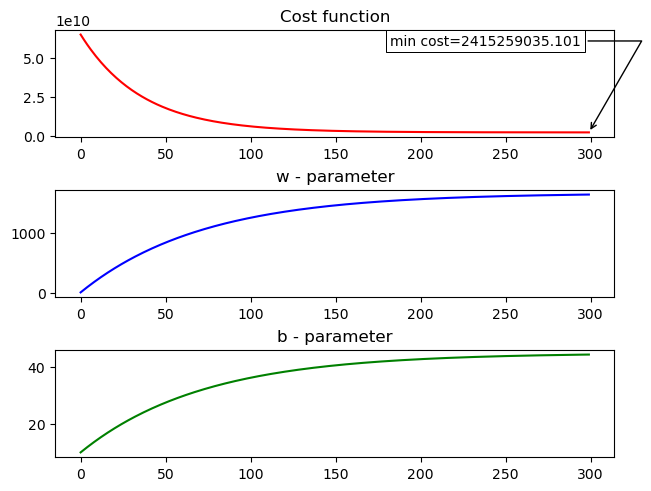

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, constrained_layout=True)
ax1.plot(cost_history, color='red')
ax1.set_title('Cost function')
w_parameter = [x[0] for x in model_parameters_history]
ax2.plot(w_parameter, color='blue') 
ax2.set_title('w - parameter')
b_parameter = [x[1] for x in model_parameters_history]
ax3.plot(b_parameter, color='green')
ax3.set_title('b - parameter')


def annot_max(x,y, ax=None):
    x_min = x[np.argmin(y)]
    y_min = y.min()
    text = "min cost={:.3f}".format(y_min)
    if not ax:
        ax = plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops = dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(x_min, y_min), xytext=(0.94,0.96), **kw)

annot_max(np.arange(len(cost_history)),np.array(cost_history),ax1)

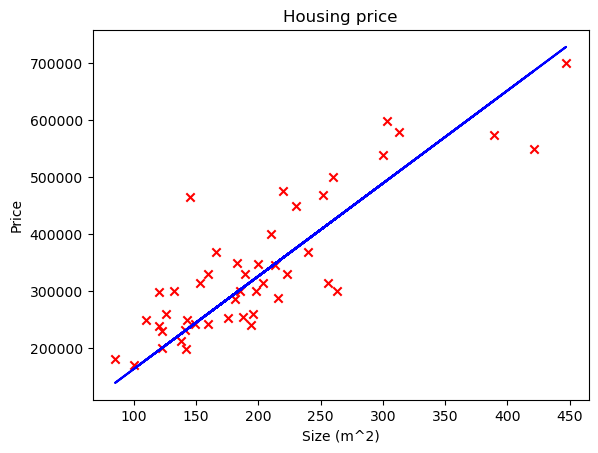

In [9]:
# get best = last results of model from training process
best_model = model_parameters_history[-1]
best_w = best_model[0]
best_b = best_model[1]

m = x_train.shape[0]

f_wb = np.zeros(m)

for i in range(m):
    f_wb[i] = best_w * x_train[i] + best_b

plt.scatter(x_train, y_train, marker='x', color='r')
plt.title('Housing price')
plt.xlabel('Size (m^2)')
plt.ylabel('Price')

plt.plot(x_train, f_wb, label='Our Prediction', color='b')

Generating of animation takes some time. Be patient..


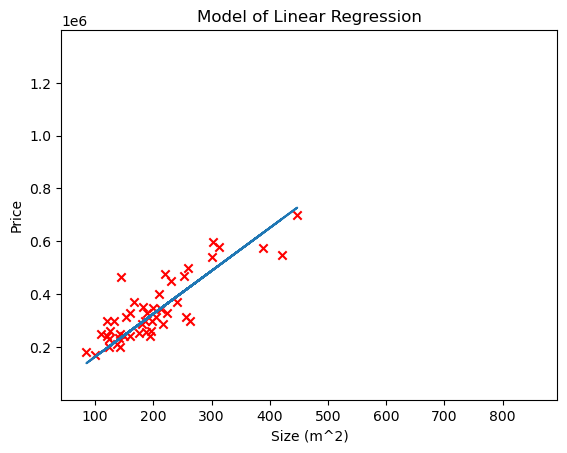

In [10]:
m = x_train.shape[0]

# for faster generation of result, we will get only each 10-tg step from all 1000 iterations
partial_model_parameters = model_parameters_history[::10]

model_progress = []

# calculate function of straight line for each model in partial_model_parameters
for w, b in partial_model_parameters:
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x_train[i] + b
    model_progress.append(f_wb)

fig, ax = plt.subplots()

line, = ax.plot([], [], lw=2)

ax.set_xlim(np.min(x_train), np.max(x_train))
ax.set_ylim(np.min(y_train), np.max(y_train))

ax.set_xlim(int(np.min(x_train)*0.5),int(np.max(x_train)*2))
ax.set_ylim(int(np.min(y_train)*0.5), int(np.max(y_train)*2))

def init():
    line.set_data([], [])
    return line,

def animate(i):
    ax.clear()
    ax.set_xlim(int(np.min(x_train)*0.5),int(np.max(x_train)*2))
    # ax.set_ylim(int(np.min(y_train)*0.5), int(np.max(y_train)*2))
    ax.set_ylim(b_init, int(np.max(y_train)*2))
    plt.scatter(x_train, y_train, marker='x', color='r')
    plt.title('Model of Linear Regression')
    plt.xlabel('Size (m^2)')
    plt.ylabel('Price')
    line, = ax.plot(x_train, model_progress[i])
    return line,

print('Generating of animation takes some time. Be patient..')
ani = animation.FuncAnimation(
    fig, animate, frames=len(model_progress), init_func=init, blit=True)

ani.save('images/housing_price_anime.gif', writer='pillow', fps=10)

display(HTML(ani.to_jshtml()))


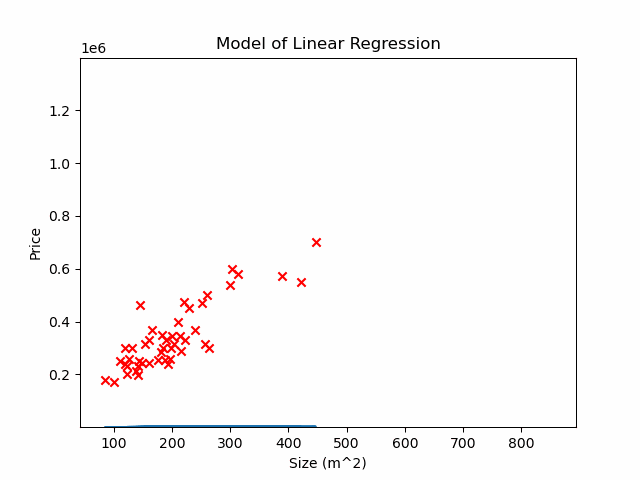

In [11]:
#If you display this notebook in GitHub, you probably don't see the beautiful animation so here is function to display GIF:

from utils import show_gif
show_gif('images/housing_price_anime.gif')